In [1]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/My Drive/Datamining/TextMining/"
version = "v3"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!cp "/content/drive/My Drive/Datamining/TextMining/Notebooks/functions.py" .
import functions as f
import importlib
importlib.reload(f)
f.v()

2020-06-02 07:31


In [0]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(f'{path}Dataset/{version}/tagged_summary.csv.gz',
                    compression='gzip', escapechar='\\', quotechar='"', encoding = "utf-8",
                    quoting=csv.QUOTE_NONNUMERIC, sep=";")

,date,total_count,repeated_count,not_repeated_count,spam_count,not_spam_count,news_count,not_news_count,emoji_positive_count,emoji_negative_count,repeated_ratio,not_repeated_ratio,spam_ratio,not_spam_ratio,news_ratio,not_news_ratio,emoji_positive_ratio,emoji_negative_ratio
0,2019-05-10,32093.0,1986.0,30107.0,10028.0,20079.0,4978.0,15101.0,168.0,8.0,0.061883,0.938117,0.333079,0.666921,0.247921,0.752079,0.008367,0.000398
1,2019-05-11,57217.0,2843.0,54374.0,17287.0,37087.0,9180.0,27907.0,284.0,5.0,0.049688,0.950312,0.317928,0.682072,0.247526,0.752474,0.007658,0.000135
2,2019-05-12,48499.0,2710.0,45789.0,16504.0,29285.0,8581.0,20704.0,246.0,3.0,0.055877,0.944123,0.360436,0.639564,0.293017,0.706983,0.008400,0.000102
3,2019-05-13,70764.0,3810.0,66954.0,21559.0,45395.0,12009.0,33386.0,305.0,11.0,0.053841,0.946159,0.321997,0.678003,0.264545,0.735455,0.006719,0.000242
4,2019-05-14,67153.0,3808.0,63345.0,22211.0,41134.0,11169.0,29965.0,291.0,1.0,0.056706,0.943294,0.350635,0.649365,0.271527,0.728473,0.007074,0.000024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019-11-19,38782.0,2533.0,36249.0,14480.0,21769.0,6292.0,15477.0,722.0,7.0,0.065314,0.934686,0.399459,0.600541,0.289035,0.710965,0.033166,0.000322
194,2019-11-20,38278.0,2421.0,35857.0,14567.0,21290.0,6352.0,14938.0,867.0,9.0,0.063248,0.936752,0.406253,0.593747,0.298356,0.701644,0.040723,0.000423
195,2019-11-21,43713.0,2538.0,41175.0,15169.0,26006.0,6913.0,19093.0,996.0,8.0,0.058061,0.941939,0.368403,0.631597,0.265823,0.734177,0.038299,0.000308
196,2019-11-22,46193.0,2461.0,43732.0,14478.0,29254.0,8367.0,20887.0,1491.0,16.0,0.053276,0.946724,0.331062,0.668938,0.286012,0.713988,0.050967,0.000547


In [14]:
df.emoji_negative_count.unique()

array([ 8.,  5.,  3., 11.,  1.,  2.,  7., 20., 22.,  6., 14.,  4., 15.,
        9., 13., nan, 12., 10., 48., 21., 26., 16.])

In [9]:
df['month'] = df.date.apply(lambda date: f.getMonth(date))
df

,date,total_count,repeated_count,not_repeated_count,spam_count,not_spam_count,news_count,not_news_count,emoji_positive_count,emoji_negative_count,repeated_ratio,not_repeated_ratio,spam_ratio,not_spam_ratio,news_ratio,not_news_ratio,emoji_positive_ratio,emoji_negative_ratio,month
0,2019-05-10,32093.0,1986.0,30107.0,10028.0,20079.0,4978.0,15101.0,168.0,8.0,0.061883,0.938117,0.333079,0.666921,0.247921,0.752079,0.008367,0.000398,5
1,2019-05-11,57217.0,2843.0,54374.0,17287.0,37087.0,9180.0,27907.0,284.0,5.0,0.049688,0.950312,0.317928,0.682072,0.247526,0.752474,0.007658,0.000135,5
2,2019-05-12,48499.0,2710.0,45789.0,16504.0,29285.0,8581.0,20704.0,246.0,3.0,0.055877,0.944123,0.360436,0.639564,0.293017,0.706983,0.008400,0.000102,5
3,2019-05-13,70764.0,3810.0,66954.0,21559.0,45395.0,12009.0,33386.0,305.0,11.0,0.053841,0.946159,0.321997,0.678003,0.264545,0.735455,0.006719,0.000242,5
4,2019-05-14,67153.0,3808.0,63345.0,22211.0,41134.0,11169.0,29965.0,291.0,1.0,0.056706,0.943294,0.350635,0.649365,0.271527,0.728473,0.007074,0.000024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2019-11-19,38782.0,2533.0,36249.0,14480.0,21769.0,6292.0,15477.0,722.0,7.0,0.065314,0.934686,0.399459,0.600541,0.289035,0.710965,0.033166,0.000322,11
194,2019-11-20,38278.0,2421.0,35857.0,14567.0,21290.0,6352.0,14938.0,867.0,9.0,0.063248,0.936752,0.406253,0.593747,0.298356,0.701644,0.040723,0.000423,11
195,2019-11-21,43713.0,2538.0,41175.0,15169.0,26006.0,6913.0,19093.0,996.0,8.0,0.058061,0.941939,0.368403,0.631597,0.265823,0.734177,0.038299,0.000308,11
196,2019-11-22,46193.0,2461.0,43732.0,14478.0,29254.0,8367.0,20887.0,1491.0,16.0,0.053276,0.946724,0.331062,0.668938,0.286012,0.713988,0.050967,0.000547,11


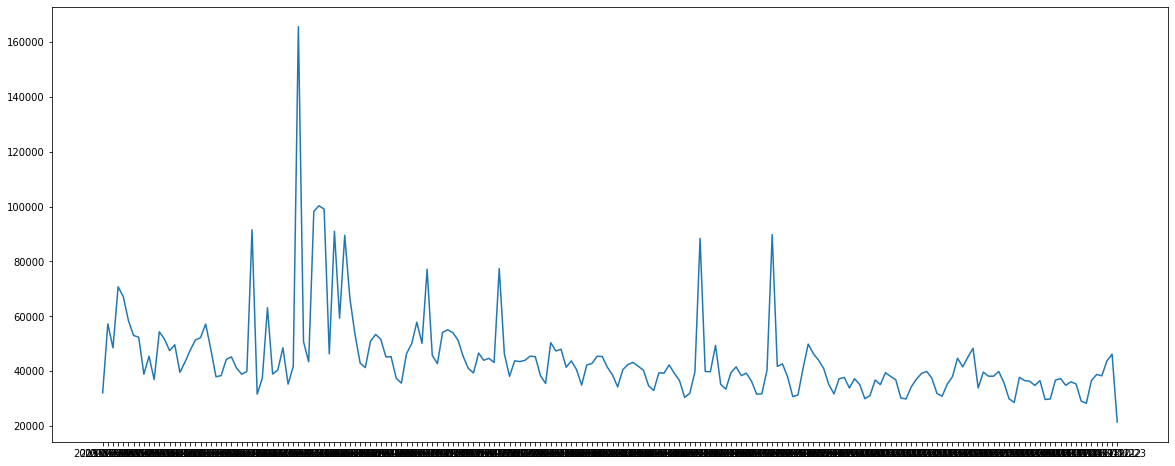

In [10]:
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['total_count'])
plt.show()

In [15]:
df_countByMonth = df.groupby('month').sum().reset_index()
df_countByMonth

,month,total_count,repeated_count,not_repeated_count,spam_count,not_spam_count,news_count,not_news_count,emoji_positive_count,emoji_negative_count,repeated_ratio,not_repeated_ratio,spam_ratio,not_spam_ratio,news_ratio,not_news_ratio,emoji_positive_ratio,emoji_negative_ratio
0,5,1103045.0,65699.0,1037346.0,368929.0,668417.0,189994.0,478423.0,11407.0,148.0,1.319617,20.680383,7.843639,14.156361,6.272019,15.727981,0.384742,0.004961
1,6,1761581.0,461313.0,1300268.0,456553.0,843715.0,218809.0,624906.0,14303.0,159.0,5.262599,24.737401,10.841375,19.158625,7.945709,22.054291,0.504238,0.005981
2,7,1500979.0,95290.0,1405689.0,507296.0,898393.0,241699.0,656694.0,28922.0,128.0,2.019958,28.980042,11.359706,19.640294,8.510789,22.489211,1.007617,0.004321
3,8,1264113.0,92019.0,1172094.0,429429.0,742665.0,197342.0,545323.0,13308.0,186.0,2.279672,28.720328,11.386973,19.613027,8.257287,22.742713,0.563754,0.007788
4,9,1256679.0,188504.0,1068175.0,405125.0,663050.0,188941.0,474109.0,15313.0,132.0,3.417812,26.582188,11.455538,18.544462,8.595015,21.404985,0.703901,0.005729
5,10,1144335.0,93359.0,1050976.0,389484.0,661492.0,187820.0,473672.0,18554.0,91.0,2.569366,28.430634,11.556022,19.443978,8.846342,22.153658,0.876947,0.004219
6,11,798436.0,57440.0,740996.0,276769.0,464227.0,133842.0,330385.0,15597.0,135.0,1.678055,21.321945,8.587631,14.412369,6.651801,16.348199,0.774276,0.006736


In [21]:
df_countByMonth['total_count'] = df_countByMonth['total_count'].astype(int)
df_countByMonth['total_count'].values

array([1103045, 1761581, 1500979, 1264113, 1256679, 1144335,  798436])

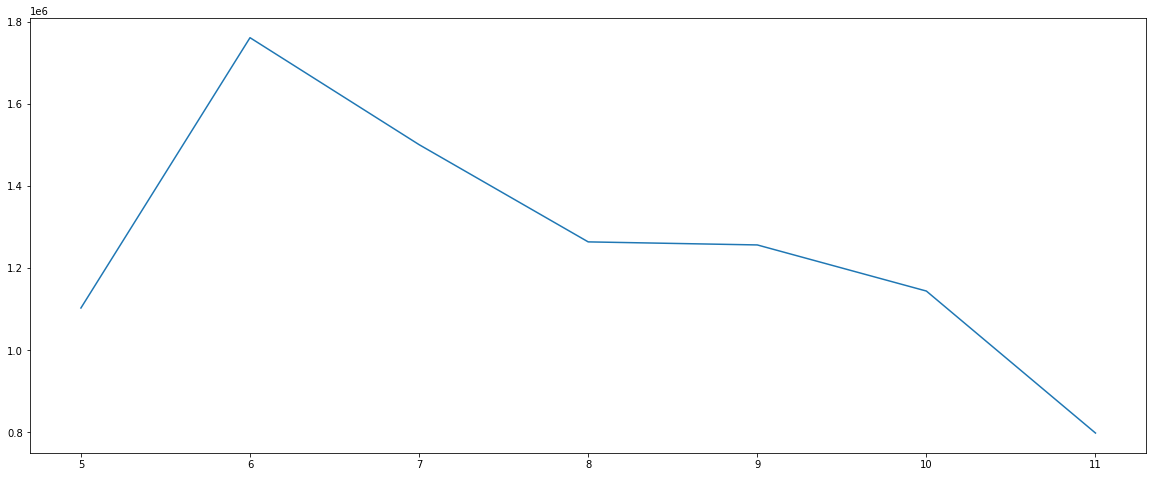

In [22]:
plt.figure(figsize=(20, 8))
plt.plot(df_countByMonth['month'], df_countByMonth['total_count'])
plt.show()

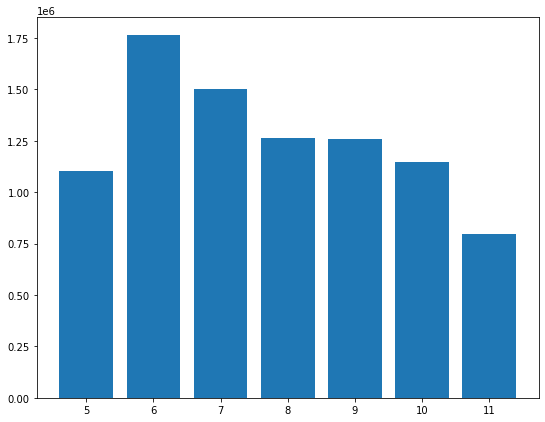

In [29]:
#plt.figure(figsize=(20, 8))
plt.figure(figsize=(9, 7))
plt.bar(df_countByMonth['month'], df_countByMonth['total_count'])
plt.show()

In [0]:
def getMonthType(month):
    if(month in [5, 6, 7, 8]):
        return 'Train'
    elif (month in [9, 10]):
        return 'Validation'
    return 'Test'

def getMonthName(month):
    return {
        5: 'Mayo',
        6: 'Junio',
        7: 'Julio',
        8: 'Agosto',
        9: 'Septiembre',
        10: 'Octubre',
        11: 'Noviembre',
    }[month]

In [0]:
df_countByMonth['type'] = df_countByMonth['month'].apply(lambda x: getMonthType(x))
df_countByMonth['month_name'] = df_countByMonth['month'].apply(lambda x: getMonthName(x))

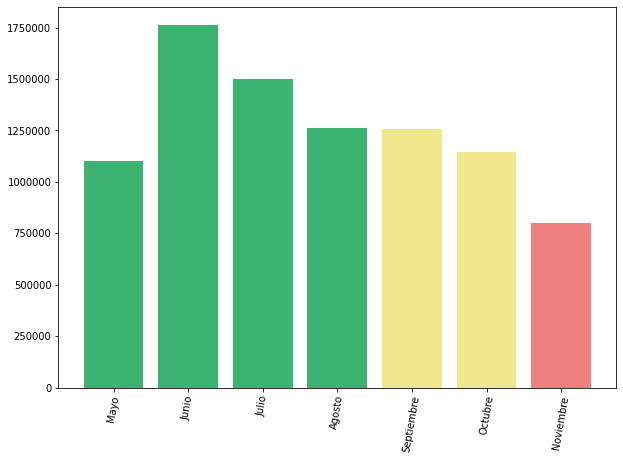

In [51]:
plt.figure(figsize=(10, 7))
plt.bar(df_countByMonth['month_name'], df_countByMonth['total_count'],
        color=['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'khaki', 'khaki', 'lightcoral'])
plt.ticklabel_format(axis= 'y', style='plain')
plt.xticks(rotation=80)
plt.show()

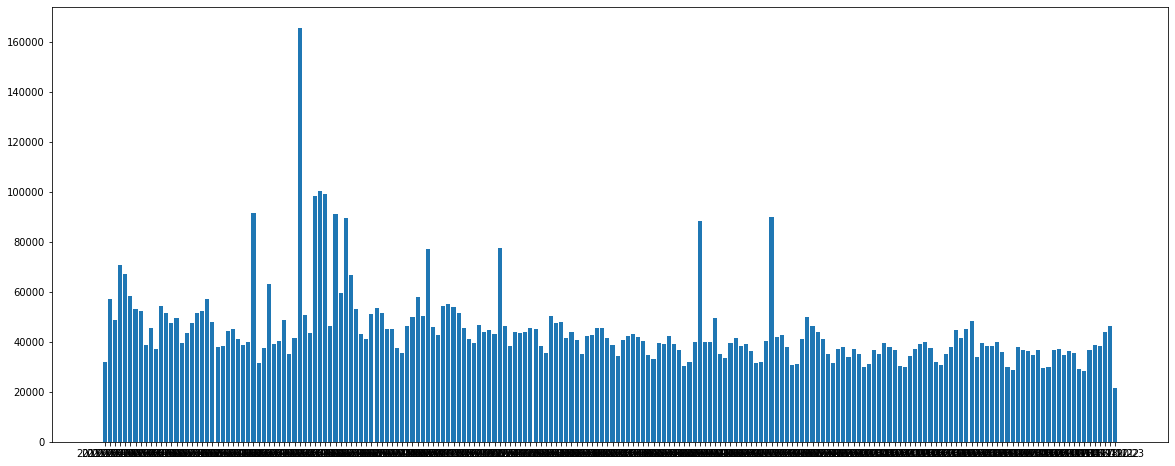

In [23]:
plt.figure(figsize=(20, 8))
plt.bar(df['date'], df['total_count'])
plt.show()